# <center> CS  4783/5783
# <center> Fall 2022
# <center> Assignment 4 – Classifier(Naïve Bayes, Decision tree, k-nearest neighbor) 
# <center> Due: 11/21/2022 11:59 pm
# <center> Submitted By: Haridas Das

# Code Compile

Click Runtime --> Restart Runtime

This will clear out all variables from memory and let you start over.

In [ ]:
# Load Drive and mount
from google.colab import drive 
#load mounting drive to access the files on the google MyDrive. 
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1
See the attached housing data (Asssignment4_Data.xlsx). Each tab in the Excel file contains training and test splits. Your goal is to construct a Naïve Bayes classifier for this data.

1. Compute and show the conditional probability distribution for each feature. Explain how you got these values and show your work.
Note: You are expected to do this part of the question by hand. Explain how you got the probability distribution for at least two features in detail.

2. Using your conditional probability table, write a Python code that will compute the probabilities for each example in the test data. Your program should output the probabilities of each class as well as the final classification based on the MAP rule.

Note: You should hard-code the conditional probabilities from the previous step into your
code.

# Slution of Problem 1

In [ ]:
import matplotlib.pyplot as plt  # Ploting MATLAB like routines
import numpy as np
import pandas as pd

In [ ]:
# import train Data 
df_train= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment4/Asssignment4_Data.xlsx','Train')
df_train.head(20)

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [ ]:
# import train Data 
df_test= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment4/Asssignment4_Data.xlsx','Test')
df_test.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


# Feature Analysis

In this problem, probably, there are four categories and four continuous variables, and I have defined the variables in the following way. 

Continuous variables: Local Price, Land Area, Living area, Age of home.  I will use the normal distribution formula to compute the conditional probability distribution for all these four features in the test data using the mean and variance from the training data for each construction type.      

Categorical variables: Bathrooms,  # Garages,    # Rooms,  # Bedrooms.  I should use the frequency-based approach in the learning phase, i.e. Statistical techniques like in Example 1 in class lecture 14 to compute the conditional probability distribution in the train Dada and use it in the test data to compute the conditional probability of test data.     

Then I can use the categorical, conditional probability from the training data and the mean and variance of the training data for each construction type in the test data to compute the conditional probability. 


Assuming four categorical variables, I got seven places that have conditional probability zeros. In that case, there is a chance of getting 0 in the MAP comparison rule.

In problem 1, part 1, should I use the normal distribution formula to compute the conditional probability distribution for all eight input features or four continuous and four categorical variables?

In [ ]:
print('Possible catagories in Bathrooms', len(df_train.Bathrooms.unique()) )
print('Possible catagories in no. of Garages', len(df_train['# Garages'].unique()) )
print('Possible catagories in no. of Rooms', len(df_train['# Rooms'].unique()) )
print('Possible catagories in no. of Bed Rooms', len(df_train['# Bedrooms'].unique()) )
print('Possible catagories in no. of Construction type', len(df_train['Construction type'].unique()) )

Possible catagories in Bathrooms 3
Possible catagories in no. of Garages 4
Possible catagories in no. of Rooms 6
Possible catagories in no. of Bed Rooms 4
Possible catagories in no. of Construction type 3


It looks like some of the features are Categorigal variables. Then I calculated 

# Problem 1: Part 1:

In this problem we have solve the problem in two ways. First assumed that features have four continuous and four categorical variables, and second assumed that all the features are continuous. In both cases, I got the same accuracy on the test data.  


# Compute the Mean and Variance in each construction type using the excel comman 'AVERAGE', 'VAR': 


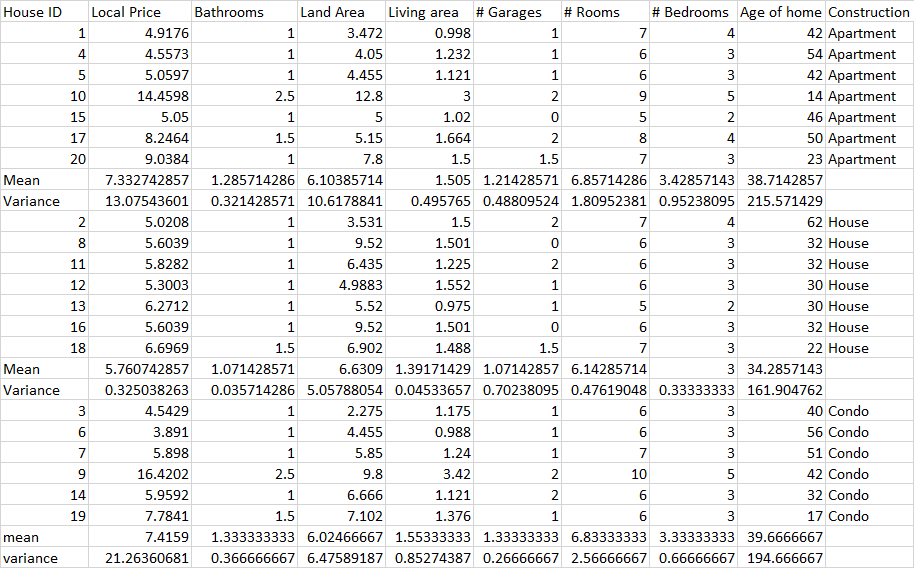

Using the Conditional probability modeled with the normal distribution: 

$$\hat P (X_j | C=c_i)= \frac{1}{\sigma_{ji} \sqrt{2 \pi}} e^{-\frac{(X_j-\mu_{ji})^2}{2 \sigma_{ji}^2}}$$, we now compute the conditional probability of the following test file. 

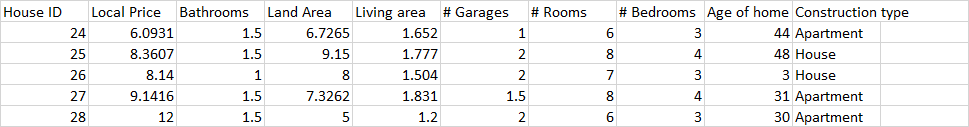

# Conditional Probability on local Price from Test Set:  

1. P(Local Price=6.0931|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.615997235} e^{-\frac{(6.0931-7.332742857)^2}{2*3.615997235^2}} = 0.104030659$. 
2. 
P(Local Price=8.3607|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.615997235} e^{-\frac{(8.3607-7.332742857)^2}{2*3.615997235^2}} = 0.105957852$. 

3. 
P(Local Price=8.14|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.615997235} e^{-\frac{(8.14-7.332742857)^2}{2*3.615997235^2}} = 0.107611731$. 

4. 
P(Local Price=9.1416|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.615997235} e^{-\frac{(9.1416-7.332742857)^2}{2*3.615997235^2}} = 0.097351713$. 

5. 
P(Local Price=12|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.615997235} e^{-\frac{(12-7.332742857)^2}{2*3.615997235^2}} = 0.04796463$. 
  

1. P(Local Price=6.0931|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.57012127} e^{-\frac{(6.0931-5.760742857)^2}{2*0.57012127^2}} = 0.590401327$. 
2. 
P(Local Price=8.3607|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.57012127} e^{-\frac{(8.3607-5.760742857)^2}{2*0.57012127^2}} = 0.0000213285$. 

3. 
P(Local Price=8.14|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.57012127} e^{-\frac{(8.14-5.760742857)^2}{2*0.57012127^2}} = 0.00011564$. 

4. 
P(Local Price=9.1416|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.57012127} e^{-\frac{(9.1416-5.760742857)^2}{2*0.57012127^2}} = 0.000000016173$. 

5. 
P(Local Price=12|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.57012127^2} e^{-\frac{(12-5.760742857)^2}{2*0.57012127^2}} = 6.89004E-27$. 

1. P(Local Price=6.0931|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 4.611247858} e^{-\frac{(6.0931-7.4159)^2}{2*4.611247858^2}} = 0.083027579$. 
2. 
P(Local Price=8.3607|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 4.611247858} e^{-\frac{(8.3607-7.4159)^2}{2*4.611247858^2}} = 0.084718011$. 

3. 
P(Local Price=8.14|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 4.611247858} e^{-\frac{(8.14-7.4159)^2}{2*4.611247858^2}} = 0.085454936$. 

4. 
P(Local Price=9.1416|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 4.611247858} e^{-\frac{(9.1416-7.4159)^2}{2*4.611247858^2}} = 0.080663932$. 

5. 
P(Local Price=12|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 4.611247858^2} e^{-\frac{(12-7.4159)^2}{2*4.611247858^2}} = 0.05278295$. 

# Conditional Probability on land Area from Test Set:  

1. P(Land Area=6.7265|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.258509497} e^{-\frac{(6.7265-6.103857143)^2}{2*3.258509497^2}} = 0.120216067$. 
2. 
P(Land Area=9.15|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.258509497} e^{-\frac{(9.15-6.103857143)^2}{2*3.258509497^2}} = 0.079090759$. 

3. 
P(Land Area=8|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.258509497} e^{-\frac{(8-6.103857143)^2}{2*3.258509497^2}} = 0.103362287$. 

4. 
P(Land Area=7.3262|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.258509497} e^{-\frac{(7.3262-6.103857143)^2}{2*3.258509497^2}} = 0.114112878$. 

5. 
P(Land Area=5|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 3.258509497} e^{-\frac{(5-6.103857143)^2}{2*3.258509497^2}} =0.115603615$. 
  


1. P(Land Area=6.7265|House)=$\frac{1}{(\sqrt{2 \pi}) * 2.248973218} e^{-\frac{(6.7265-6.6309)^2}{2*2.248973218^2}} = 0.177228437$. 
2. 
P(Land Area=9.15|House)=$\frac{1}{(\sqrt{2 \pi}) * 2.248973218} e^{-\frac{(9.15-6.6309)^2}{2*2.248973218^2}} = 0.094728838$. 

3. 
P(Land Area=8|House)=$\frac{1}{(\sqrt{2 \pi}) * 2.248973218} e^{-\frac{(8-6.6309)^2}{2*2.248973218^2}} = 0.147384458$. 

4. 
P(Land Area=7.3262|House)=$\frac{1}{(\sqrt{2 \pi}) * 2.248973218} e^{-\frac{(7.3262-6.6309)^2}{2*2.248973218^2}} = 0.169110442$. 

5. 
P(Land Area=5|House)=$\frac{1}{(\sqrt{2 \pi}) * 2.248973218} e^{-\frac{(5-6.6309)^2}{2*2.248973218^2}} =0.136374301$. 


1. P(Land Area=6.7265|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 2.544777371} e^{-\frac{(6.7265-6.024666667)^2}{2*2.544777371^2}} = 0.150918887$. 
2. 
P(Land Area=9.15|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 2.544777371} e^{-\frac{(9.15-6.024666667)^2}{2*2.544777371^2}} = 0.073745078$. 

3. 
P(Land Area=8|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 2.544777371} e^{-\frac{(8-6.024666667)^2}{2*2.544777371^2}} = 0.11599033$. 

4. 
P(Land Area=7.3262|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 2.544777371} e^{-\frac{(7.3262-6.024666667)^2}{2*2.544777371^2}} = 0.137549194$. 

5. 
P(Land Area=5|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 2.544777371} e^{-\frac{(5-6.024666667)^2}{2*2.544777371^2}} =0.144561953$. 

# Conditional Probability on Living area from Test Set:  

# Apartment in given condition

1. P(Living area=1.625|Apartment)=0.554379673 
2. 
P(Living area=1.777|Apartment)= 0.525855981 

 
3. 
P(Living area=1.504|Apartment)=0.566593641 

4. 
P(Living area=1.831|Apartment)= 0.509005858 

5. 
P(Living area=1.2|Apartment)=0.51585397 

# House in given condition

1. P(Living area=1.625|House)=0.887548309 
2. 
P(Living area=1.777|House)=0.364487546

3. 
P(Living area=1.504|House)=1.630411282 
4. 
P(Living area=1.831|House)=0.223055901 

5. 
P(Living area=1.2|House)=1.24923579 

# Condo in given condition


1. P(Living area=1.625|Condo)=0.429557952 
2. 
P(Living area=1.777|Condo)=0.419528702
3. 
P(Living area=1.504|Condo)= 0.431400867 
 

4. 
P(Living area=1.831|Condo)=0.412921903 
5. 
P(Living area=1.2|Condo)=0.401522336   

# Conditional Probability on Age of Home from Test Set:  

# Apartment in given condition

1. P(Age of Home=44|Apartment)= 0.0254666290
2. 
P(Age of Home=48|Apartment)= .0222463970
 
3. 
P(Age of Home=3|Apartment)=.0014101990


4. 
P(Age of Home=31|Apartment)=.0236684190

5. 
P(Age of Home=30|Apartment)= .022783507

# House in given condition

1. P(Age of Home=44|House)= 0.0234268790
2. 
P(Age of Home=48|House)= .0175397950
 
3. 
P(Age of Home=3|House)=.0015258640


4. 
P(Age of Home=31|House)=  .0303249940

5. 
P(Age of Home=30|House)= .02962415

# Condo in given condition


1. P(Age of Home=44|Condo)= 0.0272469560
2. 
P(Age of Home=48|Condo)= .023922150

 
3. 
P(Age of Home=3|Condo)=.0009048160

4. 
P(Age of Home=31|Condo)=.023576490

5. 
P(Age of Home=30|Condo)=.022492029  

# Case study on few Variables: 

**First** I assume that the features: Bathrooms,  Garages,    No Rooms,  No Bedrooms are catagorical variables: With that using the frequency-based approach we have computed the conditional probability. That attcaahed in a pdf in details. Here in the **second case**, we are assuming that Bathrooms,  Garages,    No Rooms,  No Bedrooms are continuous variables, then compute the conditional probability.

# Bathrooms on test: 

# P(Bathrooms|Apartment)
1. P(Bathrooms=1.5|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 0.56694671} e^{-\frac{(1.5-1.285714286)^2}{2*0.56694671^2}} = 0.655159122$. 
2. 
P(Bathrooms=1.5|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 0.56694671} e^{-\frac{(1.5-1.285714286)^2}{2*0.56694671^2}} = 0.655159122$. 

3. 
P(Bathrooms=1|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 0.56694671} e^{-\frac{(1.0-1.285714286)^2}{2*0.56694671^2}} = 0.619753975$. 

4. 
P(Bathrooms=1.5|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 0.56694671} e^{-\frac{(1.5-1.285714286)^2}{2*0.56694671^2}} = 0.655159122$. 

5. 
P(Bathrooms=1.5|Apartment)=$\frac{1}{(\sqrt{2 \pi}) * 0.56694671} e^{-\frac{(1.5-1.285714286)^2}{2*0.56694671^2}} = 0.655159122$. 
  
# P(Bathrooms|House)

1. P(Bathrooms=1.5|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.188982237} e^{-\frac{(1.5-1.071428571)^2}{2*0.188982237^2}} = 0.161336207 $ 
2. 
P(Bathrooms=1.5|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.188982237} e^{-\frac{(1.5-1.071428571)^2}{2*0.188982237^2}} =0.161336207 $
3. 
P(Bathrooms=1|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.188982237} e^{-\frac{(1.0-1.071428571)^2}{2*0.188982237^2}} = 1.965477367$ 
 

4. 
P(Bathrooms=1.5|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.188982237} e^{-\frac{(1.5-1.071428571)^2}{2*0.188982237}} = 0.161336207 $

5. 
P(Bathrooms=1.5|House)=$\frac{1}{(\sqrt{2 \pi}) * 0.188982237} e^{-\frac{(1.5-1.071428571)^2}{2*0.188982237^2}} = 0.161336207$ 

# P(Bathrooms|Condo)


1. P(Bathrooms=1.5|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 0.605530071} e^{-\frac{(1.5-1.333333333)^2}{2*0.605530071^2}} = 0.634342489$. 
2. 
P(Bathrooms=1.5|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 0.605530071} e^{-\frac{(1.5-1.333333333)^2}{2*0.605530071^2}} =0.634342489$. 

3. 
P(Bathrooms=1|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 0.605530071} e^{-\frac{(1.0-1.333333333)^2}{2*0.605530071^2}} = 0.566202987$. 

4. 
P(Bathrooms=1.5|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 0.605530071} e^{-\frac{(1.5-1.333333333)^2}{2*0.605530071^2}} = 0.634342489$. 

5. 
P(Bathrooms=1.5|Condo)=$\frac{1}{(\sqrt{2 \pi}) * 0.605530071} e^{-\frac{(1.5-1.333333333)^2}{2*0.605530071^2}} = 0.634342489$. 


# Garage on test: 

# P(Garage|Apartment)
1. P(Garage=1|Apartment)= 0.54479021 
2. 
P(Garage=2|Apartment)=0.303394801 

3. 
P(Garage=2|Apartment)= 0.303394801 

4. 
P(Garage=1.5|Apartment)=0.525219053 

5. 
P(Garage=2|Apartment)= 0.303394801
  


# P(Garage|House)
1. P(Garage=1|House)= 0.474292615 
2. 
P(Garage=2|House)=0.257663629  

3. 
P(Garage=2|House)= 0.257663629 

4. 
P(Garage=1.5|House)=0.417675919 

5. 
P(Garage=2|House)= 0.257663629


# P(Garage|Condo)
1. P(Garage=1|Condo)= 0.627260128 0
2. 
P(Garage=2|Condo)=.335748152 

3. 
P(Garage=2|Condo)= 0.335748152  

4. 
P(Garage=1.5|Condo)=0.733341387 

5. 
P(Garage=2|Condo)= 0.335748152 

# No. of Rooms test: 

# P(No. of Rooms|Apartment)

1. P(No. of Rooms=6|Apartment)= 0.242082207 
2. 
P(No. of Rooms=8|Apartment)=0.206723599  

3. 
P(No. of Rooms=7|Apartment)= 0.294902793 

4. 
P(No. of Rooms=8|Apartment)=0.206723599 

5. 
P(No. of Rooms=6|Apartment)= 0.242082207
  


# P(Rooms|House)
1. P(No. of Rooms=6|House)= 0.565865743 
2. 
P(No. of Rooms=8|House)=0.015461559 
3. 
P(No. of Rooms=7|House)= 0.26729605  

4. 
P(No. of Rooms=8|House)=0.015461559 

5. 
P(No. of Rooms=6|House)= 0.565865743


# P(Rooms|Condo)
1. P(No. of Rooms=6|Condo)= 0.217507067 
2. 
P(No. of Rooms=8|Condo)=0.191016767    

3. 
P(No. of Rooms=7|Condo)= 0.247671054 

4. 
P(No. of Rooms=8|Condo)=0.191016767 

5. 
P(No. of Rooms=6|Condo)= 0.217507067

# No. of Bedrooms test: 

# P(No. of Bedrooms|Apartment)

1. P(No. of Bedrooms=3|Apartment)= 0.371215686 
2. 
P(No. of Bedrooms=4|Apartment)=  0.344392934 
3. 
P(No. of Bedrooms=3|Apartment)= 0.371215686 


4. 
P(No. of Bedrooms=4|Apartment)=0.344392934 

5. 
P(No. of Bedrooms=3|Apartment)= 0.371215686
  

# P(No. of Bedrooms|House)

1. P(No. of Bedrooms=3|House)= 0.690988299 

2. 
P(No. of Bedrooms=4|House)= 0.15418033  

3. 
P(No. of Bedrooms=3|House)= 0.690988299 

4. 
P(No. of Bedrooms=4|House)=0.15418033 

5. 
P(No. of Bedrooms=3|House)= 0.690988299


# P(No. of Bedrooms|Condo)

1. P(No. of Bedrooms=3|Condo)= 0.449536012 
2. 
P(No. of Bedrooms=4|Condo)=  0.350098998 

3. 
P(No. of Bedrooms=3|Condo)= 0.449536012 

4. 
P(No. of Bedrooms=4|Condo)=0.350098998 

5. 
P(No. of Bedrooms=3|Condo)= 0.449536012

# Probability of each Classes:

P(Apartment)= $\frac{7}{20}=0.35$

P(House)= $\frac{7}{20}=0.35$

P(Condo)= $\frac{6}{20}=0.30$

# Code 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [ ]:
X_test=df_test.iloc[:,1:9]
X_test

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,6.0931,1.5,6.7265,1.652,1.0,6,3,44
1,8.3607,1.5,9.1500,1.777,2.0,8,4,48
2,8.1400,1.0,8.0000,1.504,2.0,7,3,3
3,9.1416,1.5,7.3262,1.831,1.5,8,4,31
4,12.0000,1.5,5.0000,1.200,2.0,6,3,30


In [ ]:
Y_test=df_test.iloc[:,-1]
Y_test

0    Apartment
1        House
2        House
3    Apartment
4    Apartment
Name: Construction type, dtype: object

In [ ]:
# Define the classification using the probability 
def classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob):
  #MAP rule selects the maximum of these probabilities
  classify = max(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)
  if (classify==Apartment_cond_Prob):
    print("Construction type is Classified as Apartment")
  if (classify==House_cond_Prob):
    print("Construction type is Classified as HOUSE")
  if (classify==Condo__Cond_Prob):
    print("Construction type is Classified as CONDO")

1. P(Apartment|all features)= P(Local Price|Apartment) X P(Bathrooms|Apartment) X P(Land Area|Apartment)X P(Living Area|Apartment)X P(No of Garages|Apartment)X X P(No of Rooms|Apartment)X P(No of Bedrooms|Apartment)X P(Age of homes|Apartment) P(apartment)= 0.104030659*0.655159122*0.120216067*0.554379673*0.54479021*0.242082207*0.371215686*0.025466629*0.35=1.98215E-06

2. P(House|all features)= P(Local Price|House) X P(Bathrooms|House) X P(Land Area|House)X P(Living Area|House)X P(No of Garages|House)X X P(No of Rooms|House)X P(No of Bedrooms|House)X P(Age of homes|House) P(House)= 0.590401327*0.161336207*0.177228437*0.887548309*0.474292615*0.565865743*0.690988299*0.023426879*0.35= 2.27833E-05


3. P(Condo|all features)= P(Local Price|Condo) X P(Bathrooms|Condo) X P(Land Area|Condo)X P(Living Area|Condo)X P(No of Garages|Condo)X X P(No of Rooms|Condo)X P(No of Bedrooms|Condo)X P(Age of homes|Condo) P(Condo)= 0.083027579*0.634342489*0.150918887*0.429557952*0.627260128*0.217507067*0.449536012*0.027246956*0.3= 1.71173E-06

# Test Data Analysis Assuming that all 8 features are cobntinuous variables:

1. P(Apartment|all features)= P(Local Price|Apartment) X P(Bathrooms|Apartment) X P(Land Area|Apartment)X P(Living Area|Apartment)X P(No of Garages|Apartment)X X P(No of Rooms|Apartment)X P(No of Bedrooms|Apartment)X P(Age of homes|Apartment) P(apartment)

2. P(House|all features)= P(Local Price|House) X P(Bathrooms|House) X P(Land Area|House)X P(Living Area|House)X P(No of Garages|House)X X P(No of Rooms|House)X P(No of Bedrooms|House)X P(Age of homes|House) P(House)


3. P(Condo|all features)= P(Local Price|Condo) X P(Bathrooms|Condo) X P(Land Area|Condo)X P(Living Area|Condo)X P(No of Garages|Condo)X X P(No of Rooms|Condo)X P(No of Bedrooms|Condo)X P(Age of homes|Condo) P(Condo)

# Data 24 Analysis:

In [ ]:
Apartment_cond_Prob=0.104030659*0.655159122*0.120216067*0.554379673*0.54479021*0.242082207*0.371215686*0.025466629*0.35
House_cond_Prob=0.590401327*0.161336207*0.177228437*0.887548309*0.474292615*0.565865743*0.690988299*0.023426879*0.35
Condo__Cond_Prob=0.083027579*0.634342489*0.150918887*0.429557952*0.627260128*0.217507067*0.449536012*0.027246956*0.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as HOUSE


# Data 25 Analysis:

In [ ]:
Apartment_cond_Prob=0.105957852*0.655159122*0.079090759*0.525855981*0.303394801*0.206723599*0.344392934*0.022246397*0.35
House_cond_Prob=2.13285E-05*0.161336207*0.094728838*0.364487546*0.257663629*0.015461559*0.15418033*0.017539795*0.35
Condo__Cond_Prob=0.084718011*0.634342489*0.073745078*0.419528702*0.335748152*0.191016767*0.350098998*0.02392215*0.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as Apartment


# Data 26 Analysis:

In [ ]:
Apartment_cond_Prob=0.107611731*0.619753975*0.103362287*0.566593641*0.303394801*0.294902793*0.371215686*0.001410199*0.35
House_cond_Prob=0.00011564*1.965477367*0.147384458*1.630411282*0.257663629*0.26729605*0.690988299*0.001525864*0.35
Condo__Cond_Prob=0.085454936*0.566202987*0.11599033*0.431400867*0.335748152*0.247671054*0.449536012*0.000904816
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as CONDO


# Data 27 Analysis:

In [ ]:
Apartment_cond_Prob=0.097351713*0.655159122*0.114112878*0.509005858*0.525219053*0.206723599*0.344392934*0.023668419*0.35
House_cond_Prob=1.61737E-08*0.161336207*0.169110442*0.223055901*0.417675919*0.015461559*0.15418033*0.030324994*0.35
Condo__Cond_Prob=0.080663932*0.634342489*0.137549194*0.412921903*0.733341387*0.191016767*0.350098998*0.02357649*0.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as Apartment


# Data 28 Analysis:

In [ ]:
Apartment_cond_Prob=0.04796463*0.655159122*0.115603615*0.51585397*0.303394801*0.242082207*0.371215686*0.022783507*0.35
House_cond_Prob=6.89004E-27*0.161336207*0.136374301*1.24923579*0.257663629*0.565865743*0.690988299*0.02962415*0.35
Condo__Cond_Prob=0.05278295*0.634342489*0.144561953*0.401522336*0.335748152*0.217507067*0.449536012*0.022492029*.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as CONDO


# Conclusion Based on the Continuous variables assumption on all the features: 

This case has only consistent with the label in test example no 27. 

When we assume 4 variables are are continuous variables, and four other are category variables, we will have the same test accuracy, i.e., the only consistent in example 27.

# Test Data Analysis Assuming that 4 features are continuous variables and 4 are continuous variables:

1. P(Apartment|all features)= P(Local Price|Apartment) X P(Bathrooms|Apartment) X P(Land Area|Apartment)X P(Living Area|Apartment)X P(No of Garages|Apartment)X X P(No of Rooms|Apartment)X P(No of Bedrooms|Apartment)X P(Age of homes|Apartment) P(apartment)

2. P(House|all features)= P(Local Price|House) X P(Bathrooms|House) X P(Land Area|House)X P(Living Area|House)X P(No of Garages|House)X X P(No of Rooms|House)X P(No of Bedrooms|House)X P(Age of homes|House) P(House)


3. P(Condo|all features)= P(Local Price|Condo) X P(Bathrooms|Condo) X P(Land Area|Condo)X P(Living Area|Condo)X P(No of Garages|Condo)X X P(No of Rooms|Condo)X P(No of Bedrooms|Condo)X P(Age of homes|Condo) P(Condo)

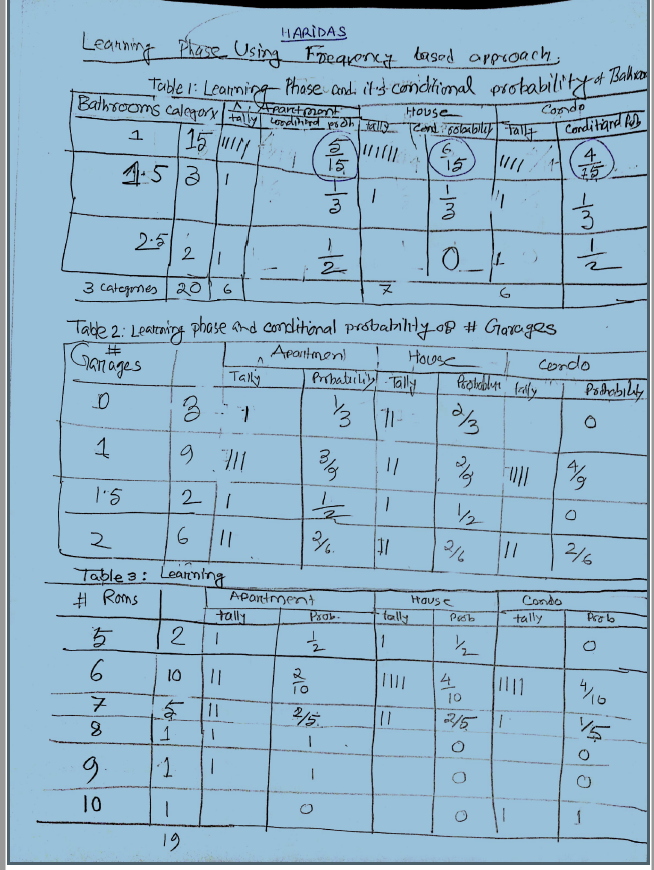

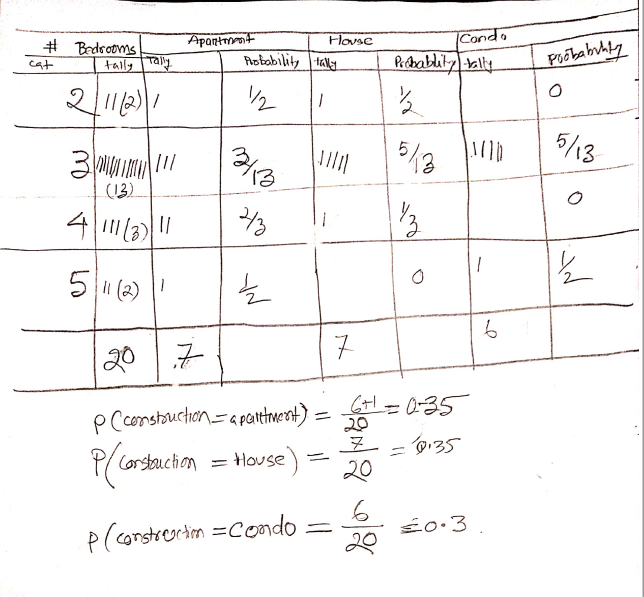

# A sample of illustration by looking at the table 1: 

P(Bathrooms=1| Construction type=Apartment)= $\frac{5}{15}$

P(Bathrooms=1| Construction type=House)= $\frac{6}{15}$

P(Bathrooms=1| Construction type=Condo)= $\frac{4}{15}$

Similarly, we can come up with the other required conditional probability whenever we need it later. 

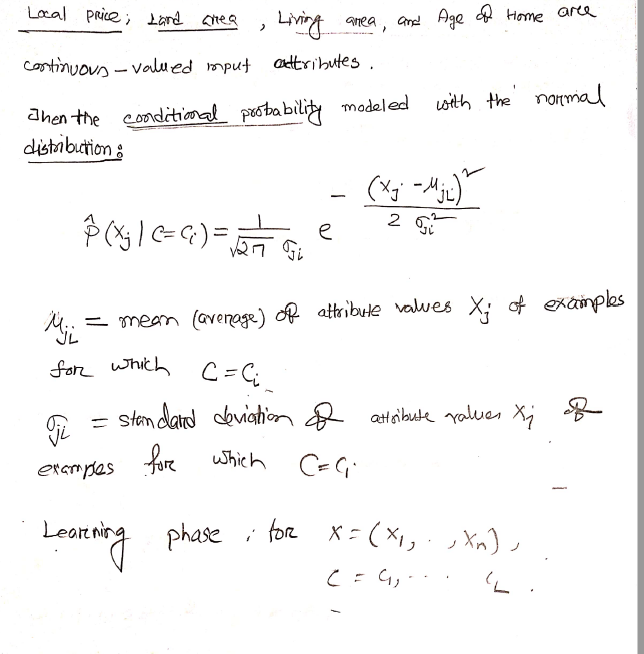

# Data 24 Analysis:

In [ ]:
Apartment_cond_Prob=0.104030659*(1/3)*0.120216067*0.554379673*(3/9)*(2/10)*(3/13)*0.025466629*0.35
House_cond_Prob=0.590401327*(1/3)*0.177228437*0.887548309*(2/9)*(4/10)*(5/13)*0.023426879*0.35
Condo__Cond_Prob=0.083027579*(1/3)*0.150918887*0.429557952*(4/9)*(4/10)*(5/13)*0.027246956*0.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as HOUSE


# Data 25 Analysis:

In [ ]:
Apartment_cond_Prob=0.105957852*(1/3)*0.079090759*0.525855981*(2/6)*(1)*(3/13)*0.022246397*0.35
House_cond_Prob=2.13285E-05*(1/3)*0.094728838*0.364487546**(2/6)*(0)*(5/13)*0.017539795*0.35
Condo__Cond_Prob=0.084718011*(1/3)*0.073745078*0.419528702**(2/6)*(0)*(5/13)*0.02392215*0.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as Apartment


# Data 26 Analysis:

In [ ]:
Apartment_cond_Prob=0.107611731*(5/13)*0.103362287*0.566593641*(2/6)*(2/5)*(3/13)*0.001410199*0.35
House_cond_Prob=0.00011564*(4/15)*0.147384458*1.630411282*(2/6)*(2/5)*(5/13)*0.001525864*0.35
Condo__Cond_Prob=0.085454936*(6/15)*0.11599033*0.431400867*(2/6)*(1/5)*(5/13)*0.000904816
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as CONDO


# Data 27 Analysis:

In [ ]:
Apartment_cond_Prob=0.097351713*(1/3)*0.114112878*0.509005858*(1/2)*(1)*(2/3)*0.023668419*0.35
House_cond_Prob=1.61737E-08*(1/3)*0.169110442*0.223055901*(1/2)*(0)*(1/3)*0.030324994*0.35
Condo__Cond_Prob=0.080663932*(1/3)*0.137549194*0.412921903*(0)*(0)*(0)*0.02357649*0.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as Apartment


# Data 28 Analysis:

In [ ]:
Apartment_cond_Prob=0.04796463*(1/3)*0.115603615*0.51585397*(2/6)*(2/10)*(3/13)*0.022783507*0.35
House_cond_Prob=6.89004E-27*(1/3)*0.136374301*1.24923579*(2/6)*(4/10)*(5/13)*0.02962415*0.35
Condo__Cond_Prob=0.05278295*(1/3)*0.144561953*0.401522336*(2/6)*(4/10)*(5/13)*0.022492029*.3
classify_construction_type(Apartment_cond_Prob, House_cond_Prob, Condo__Cond_Prob)

Construction type is Classified as CONDO


# Conclusion Based on Mixed Assumption of variables (Continuous variables and Categorical variables)

This case has only consistent with the label in test example no 27. 

When we assume all the features as continuous variables, we had the same test accuracy, i.e., the only consistent in example 27, like mixed assumption of variables. 

# Conclusion:

When we assume all the features as continuous variables, we had the same test accuracy, i.e., the only consistent in example 27, like the mixed assumption of variables. 

# Problem 2:
Using the same housing data (Asssignment4_Data.xlsx), construct a decision tree classifier. You can use the implementation available on Sci-Kit Learn. Perform the following experiments and briefly (2-4 sentences) answer the questions.

1. Use the default parameters.

           a. What is the accuracy on the training set?

           b. What is the accuracy on the test set?

2. What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.

3. Why does restricting the depth have such a strong effect on the classifier performance?

4. Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace the path taken towards classification) and provide a classification for the following example:


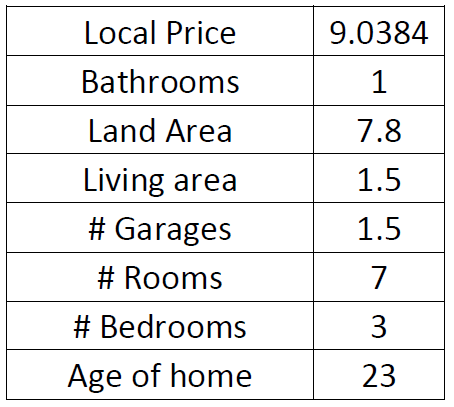


# Solution of Problem 2:

We build the **Decesiion tree**. 

In [ ]:
# Define the traing and test Data
# Assign the input features in the training data
X_train=df_train.iloc[:,1:9]
# Assign the input features
Y_train=df_train.iloc[:,-1]
# Assign the input features in the test data
X_test=df_test.iloc[:,1:9]
# Assign the output features in the test data
Y_test=df_test.iloc[:,-1]

In [ ]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score, average_precision_score, precision_recall_curve, confusion_matrix

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict)
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict)
    print("precision: %.2f%%" % (prc * 100.0)) 
    aupr = average_precision_score(y_test, y_predict)
    print("AUPR: %.2f%%" % (aupr * 100.0))
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    specificity = tn / (tn+fp)
    print("Specificity: %.2f%%" % (specificity * 100.0))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

# Problem 2: 1 (a)

 Using the default parameters, we now compute the accuracy on the training set.  

In [ ]:
y_pred = dt.predict(X_train)
accuracy_score(Y_train, y_pred)*100

100.0

# Conclusion on 2 : 1(a): 
Using the default parameters, the accuracy on the training set is 100% which is expected in the decision tree classifier. 

# Problem 2: 1 (b)

 Using the default parameters, we now compute the accuracy on the test set.  

In [ ]:
y_pred=dt.predict(X_test)
accuracy_score(Y_test, y_pred)*100

40.0

# Conclusion on 2 : 1(b): 
Using the default parameters, the accuracy on the test set is 40% when the traing accuracy was 100%. This is how the decision tree classifier behaves iin the traing and test set. Nothing wrong.   

# Problem 2 (2): 

We now find the effect of restricting the maximum depth of the tree. We now try different depths and find the best value.

accuracy for depth  1
40.0
accuracy for depth  2
80.0
accuracy for depth  3
40.0
accuracy for depth  4
40.0
accuracy for depth  5
60.0
accuracy for depth  6
60.0
accuracy for depth  7
40.0
accuracy for depth  8
60.0
accuracy for depth  9
40.0
accuracy for depth  10
60.0
accuracy for depth  11
60.0
accuracy for depth  12
60.0


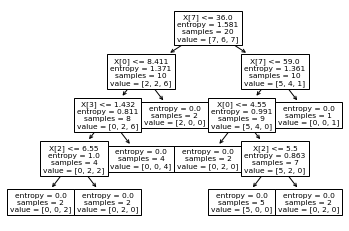

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for i in range(1,13):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dt.fit(X_train, Y_train)
    y_pred = dt.predict(X_test)
    tree.plot_tree(dt)
    print('accuracy for depth ',i)
    print(accuracy_score(Y_test, y_pred)*100)

# Conclusion on Problem 2 (2): 

We run the experiment decision tree classifier for the range 1 to 13. We have seen that depth 2 gave the best accuracy, 80% from the range of the depth. On the contrary, test accuracy decreases to a minimum when the depth increases, so depth two will give us the maximum accuracy from the depth range. For depths 10, 11, and 12, accuracy is constant, which is 60%. Therefore, the excellent depth is two, so we rerun the code for range (1,3). 

accuracy for depth  1
40.0
accuracy for depth  2
80.0


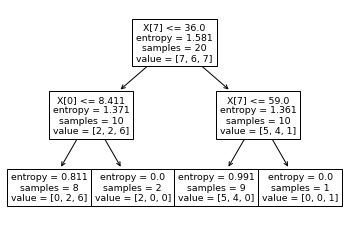

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for i in range(1,3):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dt.fit(X_train, Y_train)
    y_pred = dt.predict(X_test)
    tree.plot_tree(dt)
    print('accuracy for depth ',i)
    print(accuracy_score(Y_test, y_pred)*100)

# Problem 2: (3)
We just knew that restricting the depth strongly affects the classifier performance in the decision tree. The usual fact is that the decision tree increases the connectivity among the training data features if we increase the depth, thus resulting in the overfits of the data. Therefore, restricting the depth might reduce the accuracy in the training set, i. e., it reduces the overfitting, increasing accuracy on the test set.  

# Problem 2: (4)
After visualizing the resulting tree above Problem 2: (3), the root node is the Age of a home less than 36, which is consistent with the example in Problem 2, part-(4). The right node's most vote is given the Apartment construction type, where the left node's conclusion mostly condo in construction type. Thus the decision tree concludes that the classification is Apartment for the example mentioned in Problem 2:(4).The example follows the right path and classify it as  is Apartment type. 

# Problem 3

Using the same housing data (Asssignment4_Data.xlsx), implement the k-nearest neighbor algorithm to perform classification. Your program should take in the number of neighbors k as input and classify each example in the test set based on the majority vote from the chosen
neighbors. Compute the accuracy of your approach for different number of neighbors, ranging from 1 to 5 and explain the results briefly using a plot. You can use Euclidean distance to choose the neighbor points.

# Solution of Problem 3

In [ ]:
# Import 
from datetime import datetime # The datetime module supplies classes for manipulating dates and times. 
import matplotlib.pyplot as plt  # Ploting MATLAB like routines
import numpy as np
# set seed 
np.random.seed(10)
import random  # import random for generating random numbers
import math 
# Import statistics Library
import statistics
import pandas as pd 
from sklearn.cluster import KMeans

# Subroutinme function 

We now define the subroutine function that randomly selects K data points for K centroids. Later, it will return  K initial centroids after randomly selecting K datapoints from the training set.  

In [ ]:
df_len=len(df_train)
def initialization_random_centroids(X,K):
  #np.random.seed(0)
  centroids=[]  # define an empty set 
  for i in range(K):
    centroid = X[np.random.choice(range(df_len),replace=False)] # not replace the data 
    centroids.append(centroid)
  return np.array(centroids)

We now define the subroutine function that calculates the euclidian distance from every centroid to x gets the closest centroid id and returns it. 

In [ ]:
def calculate_euclidean_distance(x,centroids):
    nearest_centroid_to_x = np.argmin(np.sqrt(np.sum((x - centroids)**2, axis=1)))  #distance calculation
    return nearest_centroid_to_x 

This function update the cluster centroid’s positions as the average of the features in the same cluster. 

In [ ]:
def updateCentroids(x):
    s=np.zeros(8)
    for i in x:
        s+=i
    val=s/len(x)
    return  val

# Data Setting

In [ ]:
df_train= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment4/Asssignment4_Data.xlsx','Train')
df_test= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment4/Asssignment4_Data.xlsx','Test')

In [ ]:
# Assign the input features
X_train=df_train.iloc[:,1:9]
X_train

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,4.9176,1.0,3.4720,0.998,1.0,7,4,42
1,5.0208,1.0,3.5310,1.500,2.0,7,4,62
2,4.5429,1.0,2.2750,1.175,1.0,6,3,40
3,4.5573,1.0,4.0500,1.232,1.0,6,3,54
4,5.0597,1.0,4.4550,1.121,1.0,6,3,42
5,3.8910,1.0,4.4550,0.988,1.0,6,3,56
6,5.8980,1.0,5.8500,1.240,1.0,7,3,51
7,5.6039,1.0,9.5200,1.501,0.0,6,3,32
8,16.4202,2.5,9.8000,3.420,2.0,10,5,42
9,14.4598,2.5,12.8000,3.000,2.0,9,5,14


In [ ]:
# Assign the input features
Y_train=df_train.iloc[:,-1]
Y_train

0     Apartment
1         House
2         Condo
3     Apartment
4     Apartment
5         Condo
6         Condo
7         House
8         Condo
9     Apartment
10        House
11        House
12        House
13        Condo
14    Apartment
15        House
16    Apartment
17        House
18        Condo
19    Apartment
Name: Construction type, dtype: object

In [ ]:
X_test=df_test.iloc[:,1:9]
X_test

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,6.0931,1.5,6.7265,1.652,1.0,6,3,44
1,8.3607,1.5,9.1500,1.777,2.0,8,4,48
2,8.1400,1.0,8.0000,1.504,2.0,7,3,3
3,9.1416,1.5,7.3262,1.831,1.5,8,4,31
4,12.0000,1.5,5.0000,1.200,2.0,6,3,30


In [ ]:
Y_test=df_test.iloc[:,-1]
Y_test

0    Apartment
1        House
2        House
3    Apartment
4    Apartment
Name: Construction type, dtype: object

In [ ]:
K=3 # Define the Number of Clusters given in the Construction type
Xtrv=X_train.values
centroids=initialization_random_centroids(Xtrv,K)
Xtestv=X_test.values
np.disp('Print the centroids for K= 3')
print(centroids)

Print the centroids for K= 3
[[ 5.0208  1.      3.531   1.5     2.      7.      4.     62.    ]
 [ 4.5573  1.      4.05    1.232   1.      6.      3.     54.    ]
 [ 5.0597  1.      4.455   1.121   1.      6.      3.     42.    ]]


We now run the code for a fixed number of iterations to update the cluster centroids, then we get the clusters and save them in a list.

In [ ]:
cluster=[]
cluserpoints=[]
for i in range(K):
  cluster.append([])
  cluserpoints.append([])
for i in range(120):
  for j in range(K):
    cluster[j]=[]
    cluserpoints[j]=[]
  for j in range(20):
    cluster[calculate_euclidean_distance(X[j],centroids)].append(X[j])
    cluserpoints[calculate_euclidean_distance(X[j],centroids)].append(j)
  for j in range(K):
    centroids[j]=updateCentroids(cluster[j])
print(centroids)

[[ 4.4897      1.          4.012       1.24        1.33333333  6.33333333
   3.33333333 57.33333333]
 [ 7.16211429  1.28571429  5.14314286  1.51971429  1.14285714  7.
   3.42857143 44.71428571]
 [ 7.25459     1.25        7.72533     1.5239      1.2         6.4
   3.1        26.4       ]]


Here we map the classes: apartment, condo and house into 0,1,2 resprctively, and add one more column in our train and test data. 

In [ ]:
Y_train

0     Apartment
1         House
2         Condo
3     Apartment
4     Apartment
5         Condo
6         Condo
7         House
8         Condo
9     Apartment
10        House
11        House
12        House
13        Condo
14    Apartment
15        House
16    Apartment
17        House
18        Condo
19    Apartment
Name: Construction type, dtype: object

In [ ]:
df_train['Class']=df_train['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) 
df_test['Class']=df_test['Construction type'].map({'Apartment':0,'Condo':1,'House':2})

In [ ]:
X_axis=[]
Y_axis=[]
for k in range(1,15):
  match=0.0
  accuracy=0.0
  for i in range (5):
    neighbor=[]
    majority=np.zeros(3)
    for j in range(20):
      neighbor.append((np.sqrt(np.sum((Xtestv[i] - Xtrv[j]) ** 2)),j))  # Xtrv=X_train.values and Xtestv=X_test.values
    neighbor=sorted(neighbor)
    k_nearest=neighbor[:k]
    for l in k_nearest:
      majority[df_train.iloc[l[1],10]]+=1
    if np.argmax(majority)==df_test.iloc[i,10]:
      match+=1
  accuracy=match/5
  Y_axis.append(accuracy)
  X_axis.append(k)
  print(accuracy)

0.2
0.2
0.2
0.2
0.2
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4


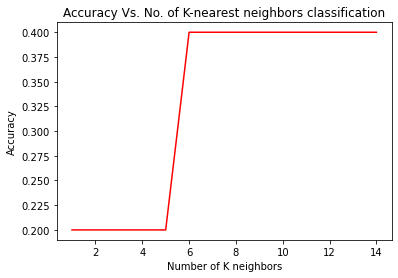

In [ ]:
# Plot accuracy vs number of k-nearest neihbors 
plt.plot(X_axis, Y_axis, color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Number of K neighbors')
plt.title('Accuracy Vs. No. of K-nearest neighbors classification')
plt.show()

# Conclusion: 

When k-nearest neighbors are greater than or equal to 6, then the accuracy is constant, so k-nearest neighbors equal to 6 would be sufficient for this data. 